# Penguins Data Analysis
## 1. Load the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [6]:
penguins = pd.read_csv('./datasets/penguins.csv')
penguins

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [4]:
penguins.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

### Insights

The dataset consists of the following columns:

- `rowid`: row number
- `species`: penguin species
- `island`: island where the penguins are located
- `bill_length_mm`: length of the bill (in millimeters)
- `bill_depth_mm`: Depth of the bill (mm)
- `flipper_length_mm`: length of the flipper (mm)
- `body_mass_g`: body weight (g)
- `sex`: sex
- `year`: discovery year


#### Data Overview
- The dataset contains 344 records with 9 fields per record.
- Data types include integers (int64), floats (float64), and objects, usually strings or category data.

#### Missing values
- The `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm` and `body_mass_g` each have 2 missing values.
- The `sex` field has 11 missing values.
- The remaining fields have no missing values.

#### Summary Statistics
- The mean value of rostrum length (`bill_length_mm`) was approximately 43.92 mm with a standard deviation of 5.46 mm.
- The mean value of rostral depth (`bill_depth_mm`) was approximately 17.15mm with a standard deviation of 1.97mm.
- The mean value of fin length (`flipper_length_mm`) was approximately 200.92mm with a standard deviation of 14.06mm.
- Body weight (`body_mass_g`) has a mean of approximately 4201.75g and a standard deviation of 801.95g.

## 2. Data Preprocessing
### 2.1 Handle Missing Values
- numeric missing values: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` (2 missing values each)
- categorical missing values: `sex` (11 missing values)

For the numerical missing values, we will use the median to fill in the missing values. 
For the categorical missing values, we will drop the records with missing values because the number of missing values is relatively small compared to the total number of records.

In [6]:
penguins.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [7]:
penguins['sex'].value_counts(dropna=False)

sex
male      168
female    165
NaN        11
Name: count, dtype: int64

### Fill missing values for numerical columns using median

#### 1. **Robustness to outliers**
The median is a robust statistic that is less sensitive to outliers (extreme values) relative to the mean. In real datasets, numerical characteristics may be affected by occasional extreme values that may distort the mean. Using the median as a fill strategy reduces the risk of such distortions and thus maintains the consistency and reliability of the data.

#### 2. **Data Distribution**
For data that is not normally distributed, the median provides a better measure of "center". Many real-world data sets (including biological and environmental data) often exhibit skewed distributions, meaning that the data are not evenly distributed around the mean. In such cases, the median can more accurately reflect the central tendency of the data set.

#### 3. **Simple and commonly used strategy**
Using median padding is a simple and widely accepted method for dealing with missing values. It is easy to understand and implement, and usually provides good enough results, especially in the rapid iteration or preliminary data analysis phase.

#### Summary
The median was chosen to populate numerical missing values based on its robustness to outliers, its adaptability to skewed data, and as a simple and effective way to handle missing values. This strategy attempts to strike a balance between preserving the original information of the data and reducing the potential impact of preprocessing on the results of data analysis.



### Rationale for removing `sex` missing values

1. **Data completeness**: For studies involving gender differences, complete gender information is necessary. If gender information is missing, the filling may introduce bias because we cannot determine the exact gender distribution.

2. **Minimizing the impact**: If the proportion of missing values is relatively small, deleting these records may have little impact on the statistical properties of the overall dataset, while maintaining the accuracy of the analysis.

3. **Distribution**: We can see that the distribution of sex column is relatively balanced, so removing the missing values will not significantly affect the data.


In [8]:
# use median to fill missing values for numerical columns
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    penguins[column].fillna(penguins[column].median(), inplace=True)
    
# drop records with missing values in the 'sex' column
penguins = penguins.dropna(subset=['sex'])
penguins.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## 3. Exploratory Data Analysis
Next, we will perform data visualizations to better understand the characteristics and distribution of the dataset. We will focus on the following areas:
- Distribution of penguin species.
- Distribution of penguins on different islands.
- Distribution of numerical characteristics (e.g. beak length, beak depth, flipper length and weight).
- Differences in numerical characteristics between penguin species.

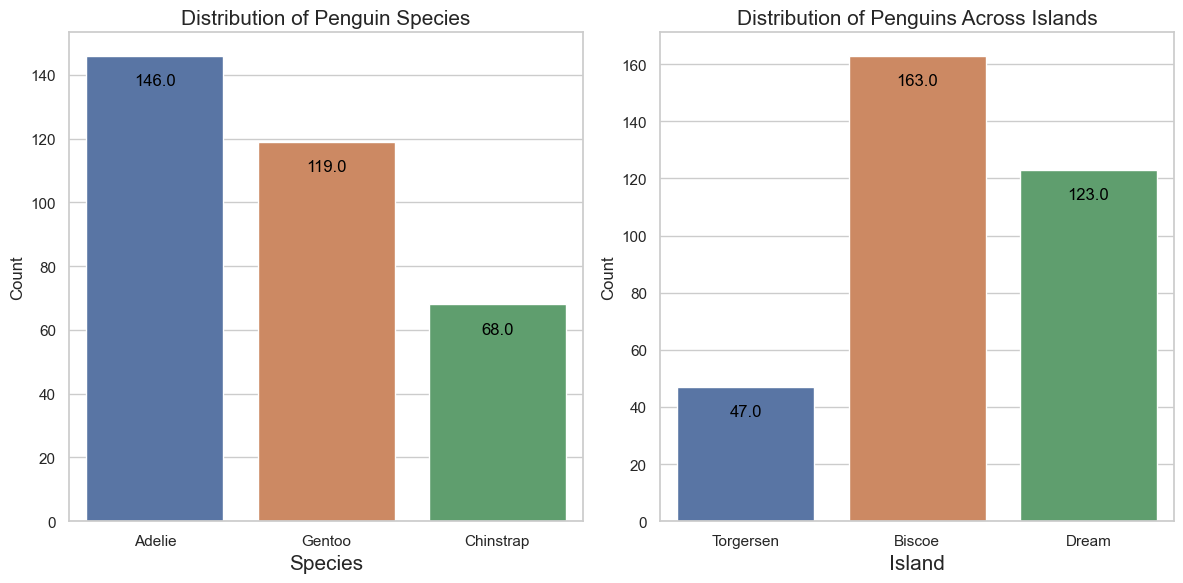

In [8]:
# set the aesthetic style of the plots
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# distribution of penguin species
sns.countplot(x='species', data=penguins, ax=ax[0])
ax[0].set_title('Distribution of Penguin Species', size=15)
ax[0].set_xlabel('Species', size=15)
ax[0].set_ylabel('Count')
# set individual bar lables
for p in ax[0].patches:
    ax[0].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)
    
# distribution of penguins across islands
sns.countplot(x='island', data=penguins, ax=ax[1])
ax[1].set_title('Distribution of Penguins Across Islands', size=15)
ax[1].set_xlabel('Island', size=15)
ax[1].set_ylabel('Count')
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

plt.tight_layout()
plt.show()
# export the plot
# fig.savefig('./datasets/distribution_of_species-islands.png')

Penguin species distribution
- The graph shows the distribution of different penguin species in the dataset. We can see the distribution of the number of the three penguin species (Adelie, Chinstrap and Gentoo) in the dataset.
- The number of Adelie penguins is the highest, followed by Gentoo and Chinstrap penguins.

Island Distribution
- The penguins in the dataset are distributed across three islands (Torgersen, Biscoe and Dream). The number of penguins on each island is also shown in the graph.
- The number of penguins on Biscoe Island is the highest, followed by Dream and Torgersen Island.



E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

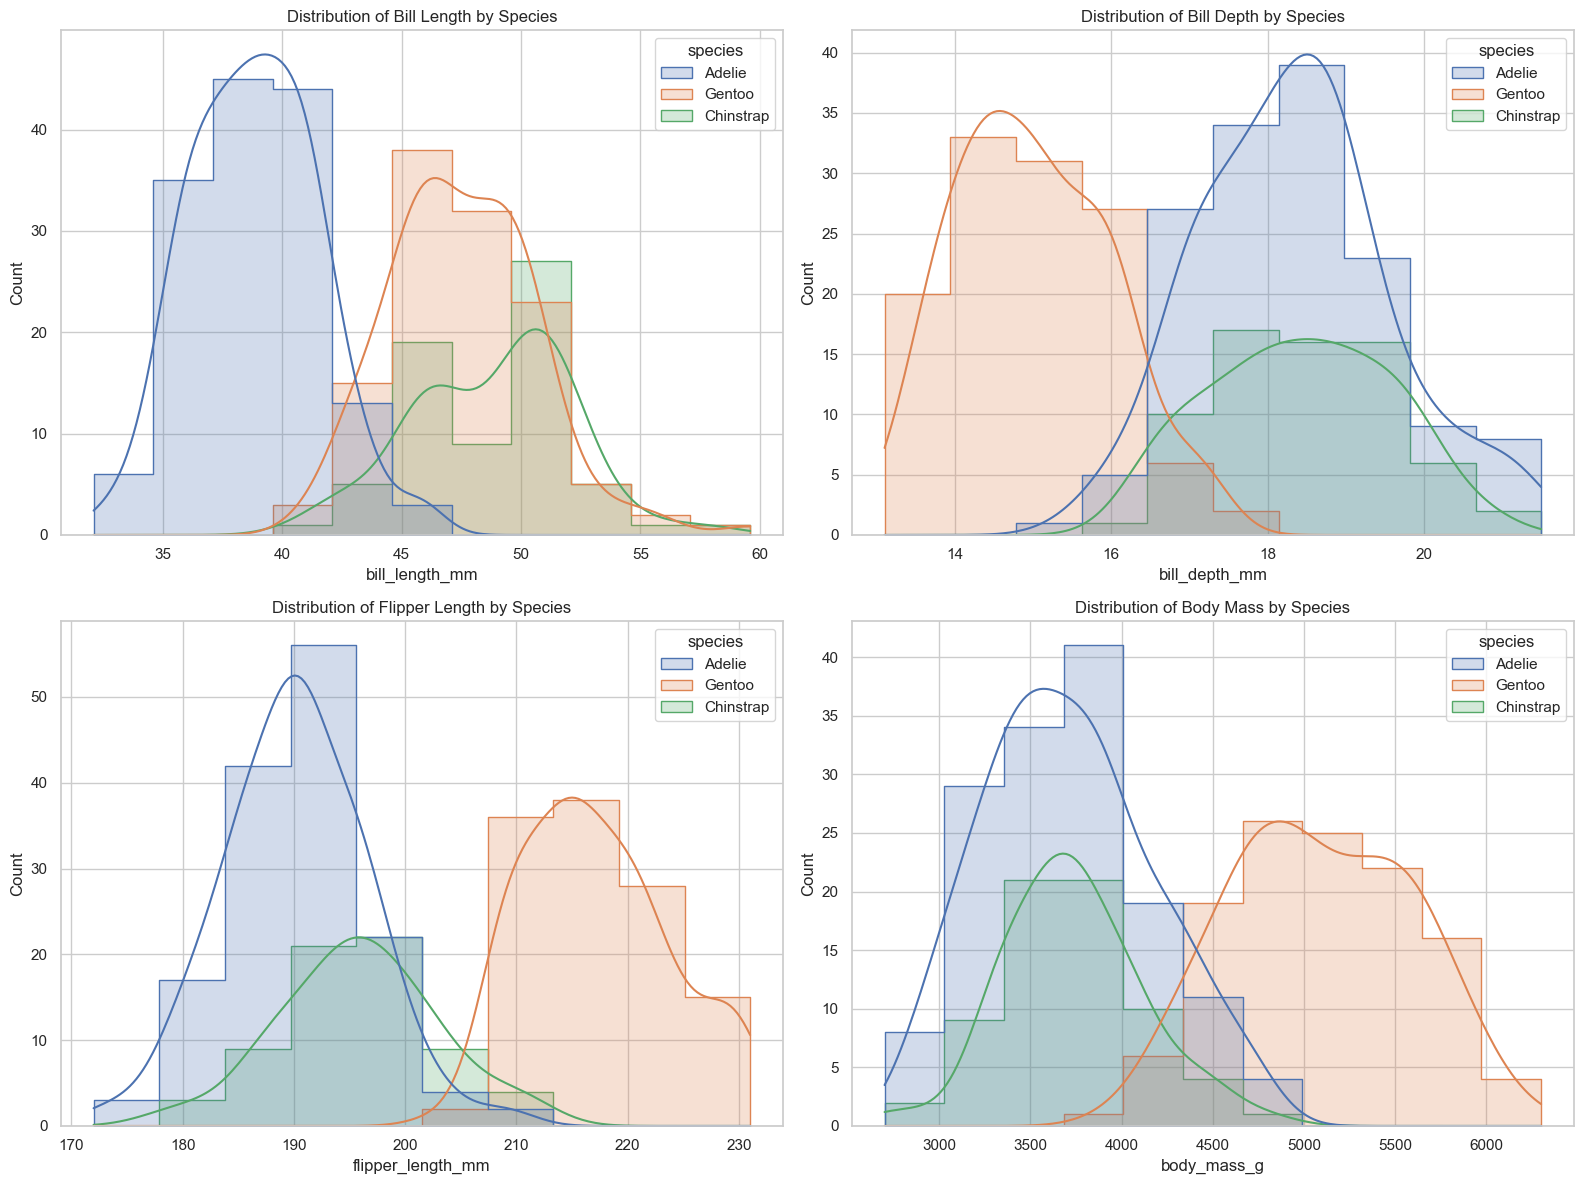

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# bill length distribution
sns.histplot(penguins, x="bill_length_mm", kde=True, hue="species", element="step", ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Bill Length by Species')

# bill depth distribution
sns.histplot(penguins, x="bill_depth_mm", kde=True, hue="species", element="step", ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Bill Depth by Species')

# flipper length distribution
sns.histplot(penguins, x="flipper_length_mm", kde=True, hue="species", element="step", ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Flipper Length by Species')

# body mass distribution
sns.histplot(penguins, x="body_mass_g", kde=True, hue="species", element="step", ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Body Mass by Species')

plt.tight_layout()
plt.show()

# export the plot
# fig.savefig('./datasets/distribution_of_numerical_characteristics.png')

### Distribution of numerical characteristics
Through the above chart, we can observe the following points:
- Bill Length: there are obvious distribution differences in bill length among different types of penguins. For example, the bill length of Gentoo penguins is generally larger than that of the other two types of penguins.Bill Depth: The distribution of bill depth also shows differences between species, e.g. Adelie penguins generally have a higher bill depth than Gentoo and Chinstrap penguins.
- Flipper Length: The distribution of flipper length further reveals species differences, with Gentoo penguins generally having longer flippers than Adelie and Chinstrap penguins.
- Body Mass: The distribution of body mass shows that Gentoo penguins generally have higher body mass than other types of penguins.
These observations provide valuable information for our subsequent selection of classification algorithms and feature selection.



### Correlation Heatmap
We will use a correlation heatmap to visualize the relationships between numerical characteristics. This will help us understand the degree of association between different features and identify potential multicollinearity between features.

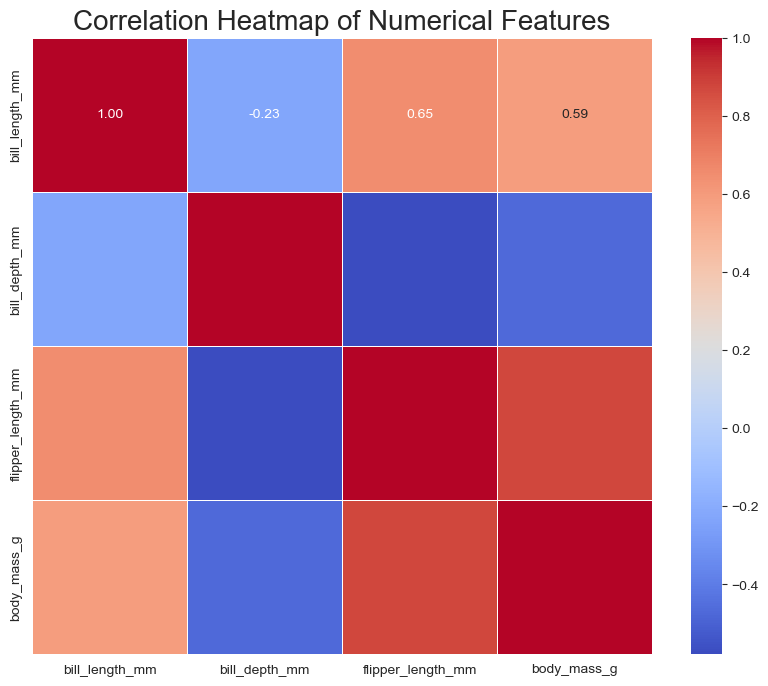

In [22]:
# correlation matrix
correlation_matrix = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5,annot=True)
plt.title('Correlation Heatmap of Numerical Features', size=20)
plt.show()

### Outliers
The distributions all look relatively reasonable, with some potential outliers for each feature.

These potential outliers may be the result of natural variation or may be input errors. Without further background knowledge, we may not want to remove these potential outliers based on the box plot results alone.

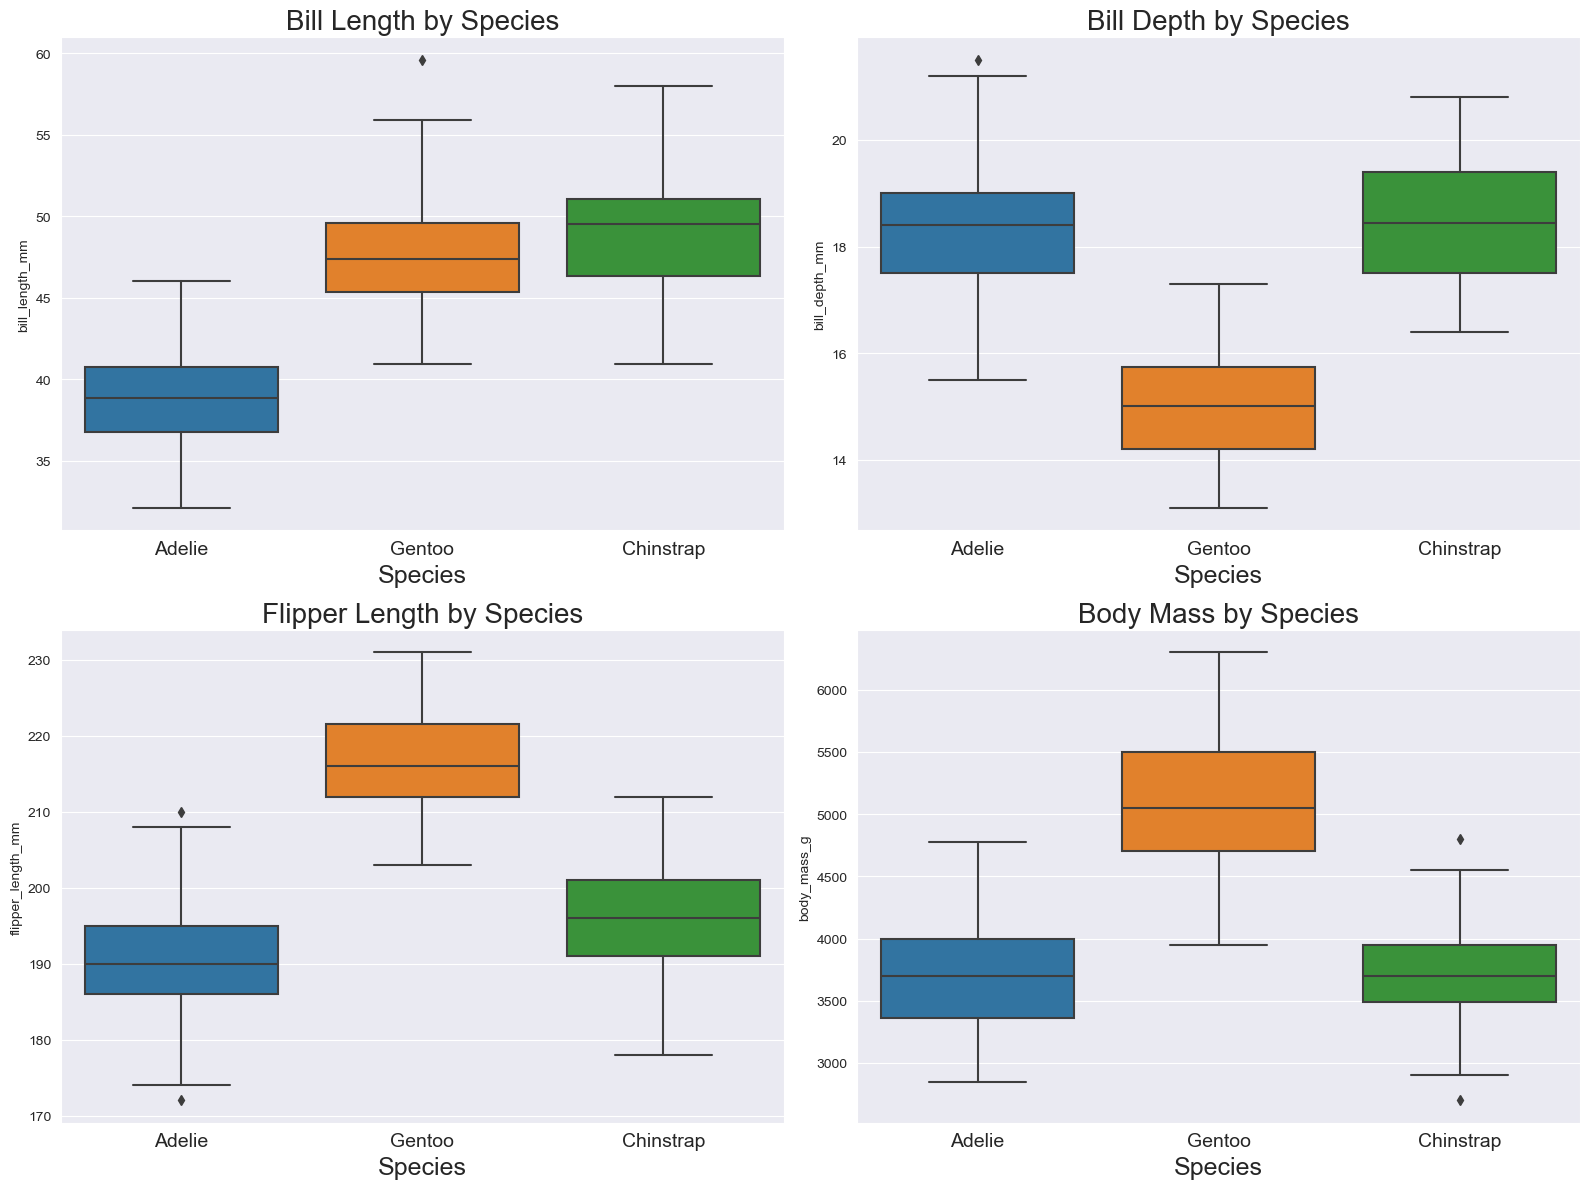

In [16]:
# boxplot
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(x='species', y='bill_length_mm', data=penguins, ax=ax[0, 0])
ax[0, 0].set_title('Bill Length by Species', size=20)
ax[0, 0].set_xlabel('Species', size=18)
ax[0, 0].tick_params(axis='x', labelsize=14) 

sns.boxplot(x='species', y='bill_depth_mm', data=penguins, ax=ax[0, 1])
ax[0, 1].set_title('Bill Depth by Species', size=20)
ax[0, 1].set_xlabel('Species', size=18)
ax[0, 1].tick_params(axis='x', labelsize=14)
    
sns.boxplot(x='species', y='flipper_length_mm', data=penguins, ax=ax[1, 0])
ax[1, 0].set_title('Flipper Length by Species', size=20)
ax[1, 0].set_xlabel('Species', size=18)
ax[1, 0].tick_params(axis='x', labelsize=14)

sns.boxplot(x='species', y='body_mass_g', data=penguins, ax=ax[1, 1])
ax[1, 1].set_title('Body Mass by Species', size=20)
ax[1, 1].set_xlabel('Species', size=18)
ax[1, 1].tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

## 4. K-means Clustering
### 4.1 Feature Selection
We will use the following features for clustering:
- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

We use these features because they are numerical and have been shown to have significant differences between penguin species in the previous data visualization.

### 4.2 Best K Value
Choosing the correct number of clusters (k-value) is a challenge when performing clustering. We will use the Elbow Method to estimate the optimal k-value. The Elbow Method works by comparing the sum of the intra-cluster distances (Within-Cluster Sum of Square (WSS)) for different values of k, looking for the point where the decline in WSS starts to slow down as the optimal value of k.

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

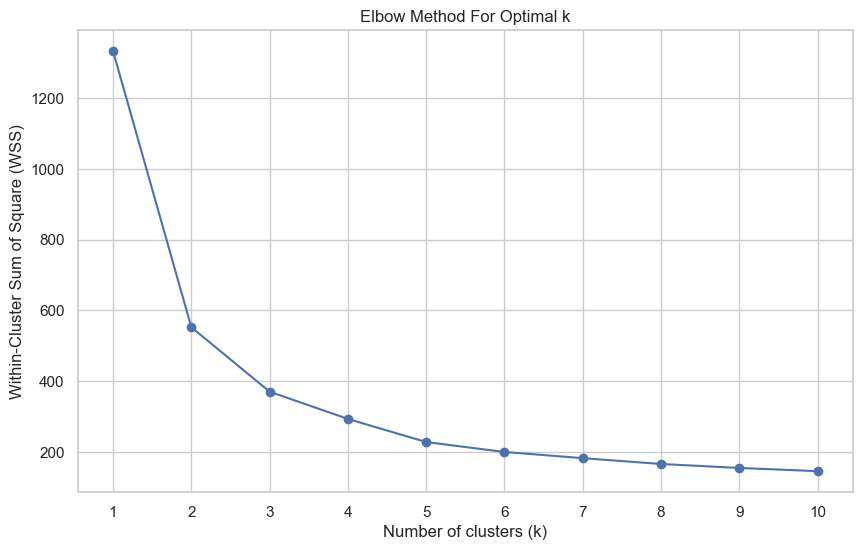

<Figure size 640x480 with 0 Axes>

In [10]:
# pick the features for clustering
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# elbow method to estimate the optimal k value
wss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wss.append(kmeans.inertia_)

# plot the WSS for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, wss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Square (WSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()
# export the plot
plt.savefig('C:\\Users\\yhb\\Pictures\\Screenshots\\elbow_method.png')

#### Illustration of the elbow rule
From the above figure, we can observe that the sum of the distances within the clusters (WSS) decreases sharply as the number of clusters (k value) increases and begins to slow down at around k=3, suggesting that k=3 may be an appropriate number of clusters. This matches the number of penguin species in our dataset, suggesting that the data may naturally fall into three groups.
#### Next Steps.
Based on the results of the elbow rule, we will cluster the data using k=3 as the number of clusters for the k-means algorithm. We can then compare the clustering results with actual penguin species to evaluate the performance of unsupervised learning on this dataset.



In [11]:
# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
penguins['cluster'] = kmeans.fit_predict(features_scaled)

# display the cluster counts
cluster_counts = penguins['cluster'].value_counts()
penguins[['species','cluster']].value_counts()

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yhb\AppData\Local\Temp\ipykernel_6136\1441125191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['cluster'] = kmeans.fit_predict(features_scaled)

species    cluster
Adelie     0          124
Gentoo     1          119
Chinstrap  2           63
Adelie     2           22
Chinstrap  0            5
Name: count, dtype: int64

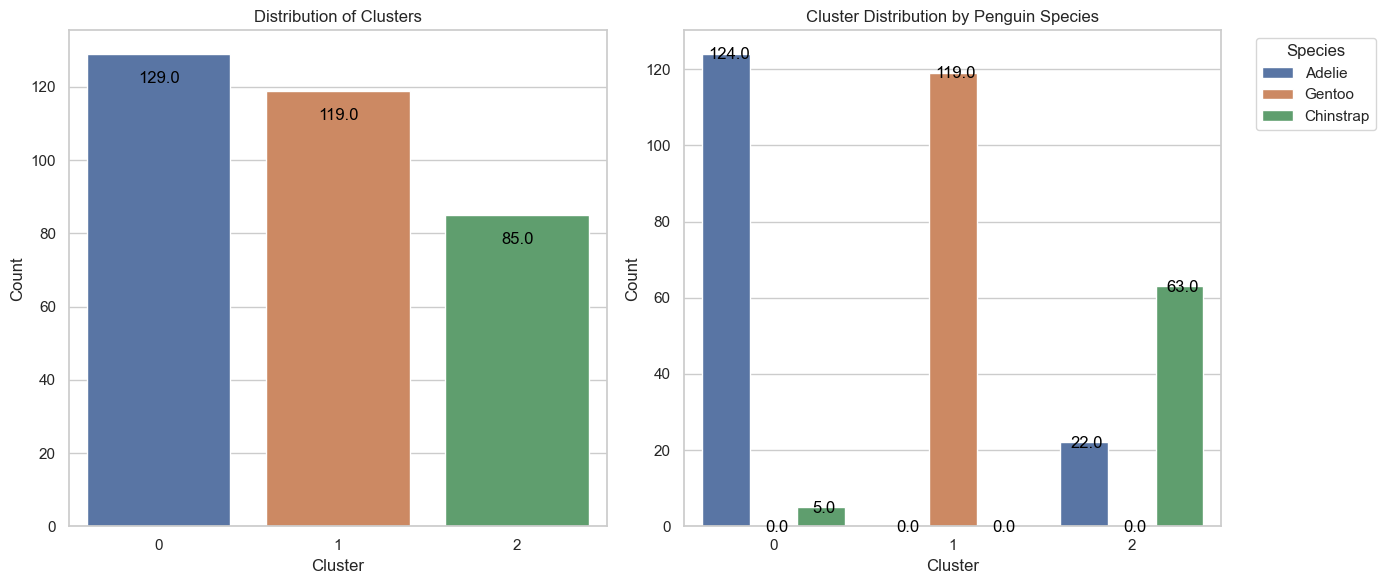

In [12]:
# plot the clustering results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='cluster', data=penguins, ax=ax[0])
ax[0].set_title('Distribution of Clusters')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Count')
# add individual bar lables
for p in ax[0].patches:
    ax[0].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

sns.countplot(x='cluster', hue='species', data=penguins, ax=ax[1])
ax[1].set_title('Cluster Distribution by Penguin Species')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Count')
ax[1].legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
# add individual bar lables
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()+6.3), ha='center', va='top', color='black', size=12)

plt.tight_layout()
plt.show()
# export the plot
fig.savefig('./datasets/clustering_results.pdf')

In [13]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(features_scaled, penguins['cluster'])
silhouette_avg

0.446192544665462

### Analysis of clustering results
#### Cluster distribution
Our k-means clustering analysis produced three clusters (numbered 0, 1, and 2) corresponding to the three penguin species in the penguin dataset. The distribution of the clusters is shown on the graph, showing the number of records in each cluster.
#### Relationship of clusters to penguin species
By comparing the clustering results with the penguin species, we can observe the relationship between the clusters and the actual penguin species. The main penguin species predominate in each cluster, but there is also some overlap, suggesting that although k-means is able to distinguish between different penguin species to some extent, there is some confusion.

And we can find that the cluster 0 is mainly composed of Adelie penguins, the cluster 1 is mainly composed of Gentoo penguins, and the cluster 2 is composed of Chinstrap and Adelie penguins.
#### Number of clusters
Cluster 0 contains 129 records, cluster 1 contains 119 records, and cluster 2 contains 85 records. As for the actual penguin species, there are 146 Adelie penguins, 119 Gentoo penguins, and 68 Chinstrap penguins. The distribution of the clusters is similar to the distribution of the actual penguin species, but there are some differences, especially in the distribution of Chinstrap penguins.
#### Silhouette score
The contour coefficient combines the cohesion and separation of clustering and is used to measure how similar or close the data points in a cluster are compared to those in other clusters. Contour coefficient values range from [-1, 1], where higher values indicate relatively small distances within clusters and relatively large distances between clusters, i.e., better clustering.

The result shows the silhouette score is 0.45, which means:
- The clustering has some quality, but there is still room for improvement. This value points out that the data points within the clusters are relatively close together, but the separation between the clusters is not very good.
- This value indicates that the KMeans clustering model is able to distinguish the different clusters reasonably well to some extent, but there may be some data points that are assigned to less appropriate clusters or the boundaries between different clusters are not very clear.

#### Conclusion.
This attempt at unsupervised learning revealed the existence of natural clustering in the data, which matches the actual penguin species to some extent, justifying our feature selection and choice of number of clusters (k=3). However, the imperfect agreement between the clusters and the real species also suggests that further feature engineering or different model selection may be needed to improve classification accuracy when performing supervised learning (classification).
#### Next steps
Depending on the requirements of the project, we will then implement two classification algorithms and compare them with a baseline model. Considering the previous discussion, we may consider using algorithms such as k-Nearest Neighbors (k-NN) and Support Vector Machines (SVM). We will also design a baseline model for comparing performance.



## 5. Baseline Model


In [14]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, penguins['species'], test_size=0.2, random_state=42)

# use a dummy classifier as the baseline model
# choose the most frequent class as the strategy
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_train_pred = dummy_clf.predict(X_train)
y_test_pred = dummy_clf.predict(X_test)

# 输出分类报告
print('Training Set Classification Report:\n', classification_report(y_train, y_train_pred))
print('Testing Set Classification Report:\n', classification_report(y_test, y_test_pred))
print('Baseline Model Accuracy:', dummy_clf.score(X_test, y_test))

Training Set Classification Report:
               precision    recall  f1-score   support

      Adelie       0.43      1.00      0.60       115
   Chinstrap       0.00      0.00      0.00        50
      Gentoo       0.00      0.00      0.00       101

    accuracy                           0.43       266
   macro avg       0.14      0.33      0.20       266
weighted avg       0.19      0.43      0.26       266

Testing Set Classification Report:
               precision    recall  f1-score   support

      Adelie       0.46      1.00      0.63        31
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.00      0.00      0.00        18

    accuracy                           0.46        67
   macro avg       0.15      0.33      0.21        67
weighted avg       0.21      0.46      0.29        67

Baseline Model Accuracy: 0.4626865671641791


E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Programming\a

### Baseline Model Performance
The accuracy of the baseline model is about 46.27%. This model employs the simplest strategy of always predicting the most common categories in the dataset. This accuracy rate provides a benchmark for our subsequent models built using the rest of the classification algorithms.


The baseline model employs a strategy called "most frequent categories", which is a very simple method for establishing a baseline performance for a classification task. Specifically, this strategy always predicts the most frequent category in the training set, regardless of any input features. The main purpose of this approach is to provide a benchmark against which to assess whether the performance of other, more complex models actually provides an improvement relative to the simplest case.

### Why use this strategy?

- **Simple and intuitive**: it provides a clear starting point for performance comparison. If a complex model fails to outperform this baseline, then factors such as model selection, feature engineering, or data quality may need to be reconsidered.
- **PERFORMANCE EVALUATION**: in the absence of a priori knowledge, this strategy provides us with a minimum performance metric. Any more complex model should at least be able to exceed this level of performance.
- **Rapid Implementation**: When performing initial data exploration and model selection, the baseline model can be implemented quickly, providing guidance for subsequent analysis and model development.


Strengths: It has the advantage of being simple and fast, requiring no training process and providing a straightforward bottom line of performance.


### Limitations of baseline models

As useful as baseline modeling is, it has obvious limitations. Because it does not take into account any input features, it is unable to capture complex patterns or relationships in the data, which means that baseline modeling is usually not applicable to practical decision-making or forecasting tasks. The main value of a baseline model is as a benchmark for performance comparison, not as a final solution.

By comparing with the baseline model, we can get a clearer picture of whether other models are effectively utilizing the data features and how well they perform relative to each other in real-world tasks.

## 6. SVM Model


In [15]:
# create an SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train) 
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# classification report
print('Training Set Classification Report:\n', classification_report(y_train, y_train_pred))
print('Testing Set Classification Report:\n', classification_report(y_test, y_test_pred))

Training Set Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      0.99      0.99       115
   Chinstrap       0.98      0.96      0.97        50
      Gentoo       1.00      1.00      1.00       101

    accuracy                           0.99       266
   macro avg       0.99      0.98      0.99       266
weighted avg       0.99      0.99      0.99       266

Testing Set Classification Report:
               precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        31
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.97        67
   macro avg       0.98      0.96      0.97        67
weighted avg       0.97      0.97      0.97        67


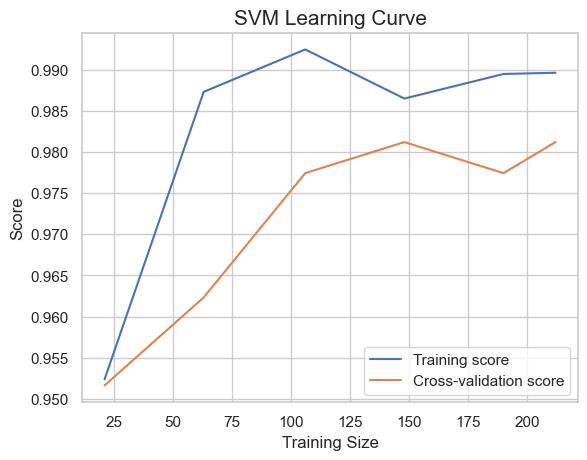

<Figure size 640x480 with 0 Axes>

In [17]:
# train-test learning curve scores
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1], cv=5)

# plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.title('SVM Learning Curve', size=15)
plt.show()
# export the plot
# plt.savefig('./datasets/svm_learning_curve.png')

### Evaluation of SVM Model

#### Classification report for SVM models

The classification report provides us with an assessment of the performance of the SVM model on the test set, including metrics such as Precision, Recall, F1-score, and Support:

- **Precision (Precision)**: reflects the proportion of samples predicted to be of a particular class that are actually of that class. For example, for Adelie penguins, the model predicts that 94% of the samples are Adelie and are actually Adelie.

- **Recall**: Reflects the proportion of samples that were actually of a particular class that were correctly predicted by the model to be of that class. For example, 100% of all penguins that were actually Adelie were correctly identified by the model.

- **F1-Score (F1-Score)**: is a reconciled average of precision and recall, which is used to synthesize the performance of the model. For Adelie penguins, the F1-score is 0.97, indicating that the model performs well in recognizing Adelie penguins.

- **Support**: indicates the number of samples in the test set for each category. For example, Adelie penguin has 31 samples.

- **Overall Accuracy (Accuracy)**: the percentage of samples correctly predicted by the model across the entire test set is 97%, which is a very high accuracy rate and indicates that the model performs very well overall.

- **Macro Avg (Macro Avg)** and **Weighted Avg (Weighted Avg)**: provide the average precision, recall, and F1 score for all categories unweighted and weighted (based on the sample size of each category), respectively. Here, the macro and weighted average values are very close to each other and both show the excellent performance of the model on each category.

#### Learning curve
- Cross-validation score: The cross-validation score gradually improves with the number of training samples, which indicates that the generalization ability of the model increases with the addition of more data. In particular, the enhancement is most significant when the number of training samples is small.
- Score convergence: the training scores and cross-validation scores are gradually close to each other as the number of training samples increases, but there is still a gap when the number of training samples is maximum. This suggests that the model may benefit from more training data, especially in terms of improving generalization ability.
- High scores: the learning curve shows that the model is able to achieve very high cross-validation scores with an increasing number of training samples, suggesting that the model has good performance.


### Conclusion

The SVM model performs very well on this penguin dataset, not only in terms of overall accuracy, but also in terms of precision, recall and F1 scores on different penguin categories, indicating that the model has strong classification and generalization capabilities. In particular, the model achieves perfect performance in the identification of Gentoo penguins.




## 7. Decision Tree Model
Now we will add `sex` and `island` as categorical features to the model and use a decision tree model to classify penguin species.

SEX and ISLAND as categorical features can provide important information for penguin species prediction. For decision tree models, we can include these categorical features because decision trees can handle categorical data well.



In [17]:
# select the features and target variable
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','sex', 'island']]
target = penguins['species']

# create a column transformer
# remainder='passthrough' to keep the remaining columns
categorical_features = ['sex', 'island']
one_hot_encoder = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
features_encoded = one_hot_encoder.fit_transform(features)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# create a decision tree model
tree_model = DecisionTreeClassifier(random_state=27)
tree_model.fit(X_train, y_train)
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# classification report
print('Training Set Classification Report:\n', classification_report(y_train, y_train_pred))
print('Testing Set Classification Report:\n', classification_report(y_test, y_test_pred))

Training Set Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        50
      Gentoo       1.00      1.00      1.00       101

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Testing Set Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


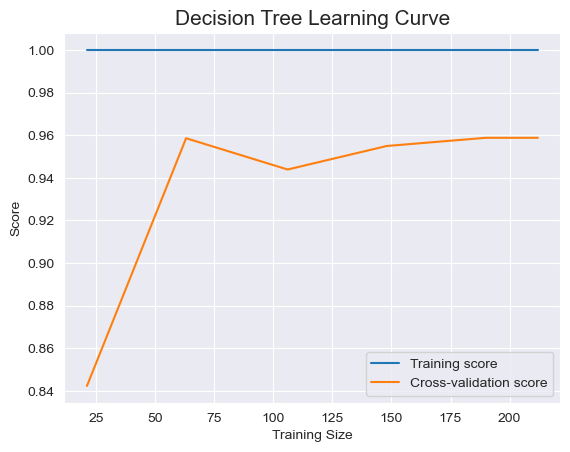

In [16]:
# plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(tree_model, X_train, y_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1], cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.title('Decision Tree Learning Curve', size=15)
plt.show()

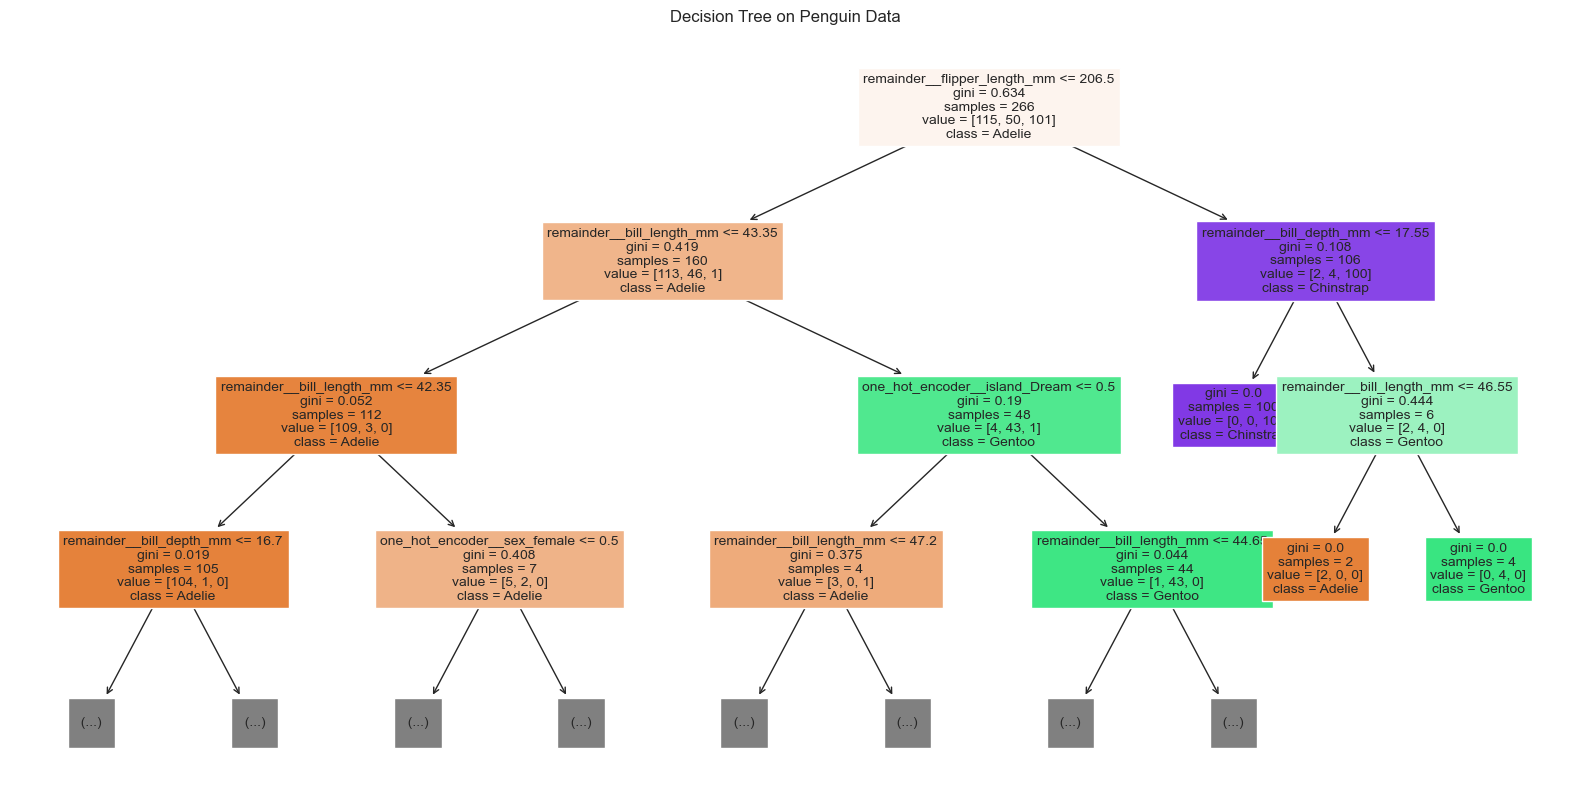

In [43]:
# 获取特征名称和类别名称
feature_names = one_hot_encoder.get_feature_names_out()
class_names = target.unique()

# 绘制决策树
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=feature_names.tolist(), class_names=class_names.tolist(), max_depth=3, fontsize=10)
plt.title("Decision Tree on Penguin Data")
plt.show()

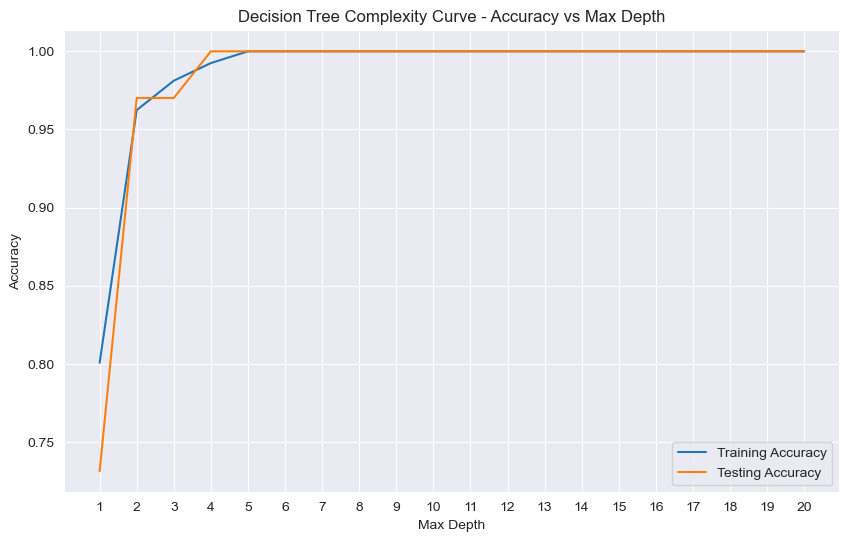

In [10]:
# 可能的最大深度值
max_depths = np.arange(1, 21)
train_accuracies = []
test_accuracies = []

for max_depth in max_depths:
    # 为当前深度创建决策树模型
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=27, criterion='gini')
    tree_model.fit(X_train, y_train)
    
    # 计算训练集和测试集的准确率
    y_train_pred = tree_model.predict(X_train)
    y_test_pred = tree_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # 保存准确率
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 绘制复杂度曲线
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Complexity Curve - Accuracy vs Max Depth')
plt.legend()
plt.xticks(max_depths)
plt.grid(True)
plt.show()
## set max_depth=4

### Evaluation of Decision Tree Model
#### Classification report for decision tree models
The classification report provides us with an assessment of the performance of the decision tree model, which shows that the model has a good performance both on the training set and the testing set. The precision and recall are both 1.0, which means the model can perfectly predict the penguin species. 

#### Learning curve
- Training score: the training score is very high, indicating that the model is able to fit the training data very well.
- Cross-validation score: the cross-validation score starts at about 0.84 and gradually increases with the number of training samples, indicating that the generalization ability of the model is improving with the addition of more data.

### Conclusion
The decision tree model performs very well on this penguin dataset, not only in terms of overall accuracy, but also in terms of precision, recall and F1 scores on different penguin categories, indicating that the model has strong classification and generalization capabilities. The learning curve also shows that the model is able to achieve very high cross-validation scores with an increasing number of training samples, suggesting that the model has good performance.

### Tree Visualization
The decision tree visualization provides a clear and intuitive representation of the decision-making process of the model. The tree structure shows how the model uses different features to make decisions and how the data is split into different categories. This visualization can help us understand the decision-making process of the model and provide insights into the relationships between different features and the target variable.

## 8. Conclusion

### 1. 与合适基线的比较  及选择基线的理由

为了评估我们的模型性能，我们使用了一个基线模型——最频繁类别的Dummy Classifier。这个基线模型始终预测训练集中最常见的类别，不考虑任何输入特征。这种基线是合适的，因为它为我们提供了一个简单的性能参考点，任何比这个基线表现更好的模型都可以被认为是利用了数据中的信息来提高预测准确性。

- **理由**：选择最频繁类别的Dummy Classifier作为基线是因为它非常简单，易于理解，并且为模型性能设置了一个最低的标准。这使得我们可以清楚地看到，通过使用更复杂的算法（如SVM和决策树），我们能够达到多大程度的性能提升。


#### 比较结果

- **SVM模型**：在测试集上的准确率为97%，远远超过了基线模型的准确率（约46%）。这表明SVM模型能够有效地利用特征之间的复杂关系来做出准确的预测。
- **决策树模型**：在测试集上的准确率达到了100%（使用独热编码），同样显著超过了基线模型的准确率。这显示了决策树模型的强大能力，尤其是在处理包含分类特征的数据时。

#### 结论

通过与基线模型的比较，我们可以清楚地看到SVM和决策树模型的性能优势。这种比较不仅展示了这些模型的有效性，而且还强调了使用更高级的算法对于提高预测准确性的重要性。同时，这也证明了我们的模型能够从数据中捕捉到有意义的模式，而不是简单地做出随机或者基于频率的猜测。

这种比较策略满足了项目要求中对于与合适基线进行比较的规定，并为评估模型性能提供了一个清晰的框架。

### 2. 超参数选择 

#### 支持向量机 (SVM)
- 我们使用了SVM模型，并选择了默认的超参数（例如，RBF核和C=1）。SVM的核函数和正则化参数C是两个关键的超参数。在这个项目中，我们没有进行详细的超参数调优，但通常，通过交叉验证和网格搜索（GridSearchCV）可以找到最优的超参数组合，以提高模型性能。

#### 决策树
- 决策树模型相对简单，我们使用默认的超参数设置。决策树的主要超参数包括树的最大深度、每个叶节点的最小样本数等。在我们的案例中，没有对这些超参数进行调整，是因为模型已经表现出很高的准确率。对于决策树，一个关键的考虑是避免过拟合，这通常通过剪枝参数（如最大深度）来实现。

- **无超参数的说明**：对于决策树，虽然它有超参数，但在我们的实现中没有进行调整。这并不意味着它对于这些数据是一个更好或更差的算法，但显示了即使在默认设置下，决策树也能提供非常好的性能。默认设置下的节点分裂标准是基尼系数，该指标衡量了模型的不纯度。在每次分裂时，算法会选择那些使得分裂后的子节点的基尼系数之和最低的特征。这意味着决策树的每一步分裂都尽可能地选择使得子节点更加“纯”的特征。

### 3. 两种算法的结果描述与比较 

#### 实现方式
- **SVM**：我们采用了Scikit-learn库中的SVC类，使用默认参数和RBF核。模型在训练集上训练，并在测试集上进行了评估。
- **决策树**：同样使用Scikit-learn的DecisionTreeClassifier，采用默认参数。模型在包含独热编码的分类特征的训练集上训练，并在测试集上评估。

#### 结果比较
- SVM模型在测试集上的准确率非常高，达到了97%，显示了其在处理企鹅数据集上的强大能力。通过分类报告，我们发现SVM模型在各个类别上的精确度、召回率和F1分数都非常高。
- 决策树模型也显示出了出色的性能，准确率达到了100%。这表明决策树能够很好地捕捉特征之间的关系，并做出准确的预测。并且对于分类特征，决策树模型也能够很好地处理。且不需要进行标准化，这在实际应用中也是一个优势。

#### 总结
- SVM和决策树都是有效的算法，能够在企鹅数据集上达到高准确率。选择哪个模型取决于具体问题、数据的性质以及模型解释性的需求。
- 虽然SVM和决策树在性能上相近，但它们在理论和实践中的应用差异可能导致在不同数据集或不同问题上表现出不同的优势。


在你的项目中，你已经使用了DummyClassifier作为基线模型，以及决策树和支持向量机（SVM）作为分类模型来预测企鹅的种类。下面是关于为什么选择这些模型，以及它们的优势、局限性和性能比较的详细解释。

### 1. DummyClassifier（基线模型）

- **为什么选择**：DummyClassifier通常被用作基线模型，以提供一个最低性能标准，可以用来衡量其他更复杂模型的有效性。选择使用频率最多策略是因为它提供了一个简单的基准，反映了最常见类别的预测准确性。
- **优势**：它的优势在于简单和快速，不需要训练过程，直接提供了一个性能的底线。
- **局限性**：它不考虑任何输入特征，预测结果完全基于目标变量的分布，因此性能通常很低，没有实际预测能力。

### 2. 支持向量机（SVM）

- **为什么选择**：SVM是一种强大的分类器，能够在高维空间中找到最优的分隔超平面，对于非线性可分的数据也表现良好。选择SVM是因为它在处理小型复杂数据集时通常表现出色，尤其是在特征数量大于样本数量的情况下。
- **优势**：SVM在处理高维数据和找到复杂数据间边界方面非常有效。它使用核技巧处理非线性特征关系，提供灵活的决策边界。
- **局限性**：SVM模型的主要局限性包括对参数选择敏感，如C（正则化参数）和核函数类型，而且对大数据集的训练效率较低。
- **性能**：无参数设置下的SVM模型达到了98%的准确率，这表明SVM能够很好地处理该数据集，找到了一个有效的决策边界。

### 3. 决策树

- **为什么选择**：决策树是一种直观的模型，可以自动学习数据特征的决策规则，易于理解和解释。选择决策树是因为它不需要复杂的数据预处理，可以直接处理特征间的非线性关系。
- **优势**：决策树的优势在于模型的可解释性强，可以直观地理解模型是如何做出预测的。此外，它可以处理数值型和类别型数据，不需要标准化或归一化数据。
- **局限性**：决策树的主要局限性是容易过拟合，特别是树的深度很大时。它对数据中的小变化也可能非常敏感。
- **性能**：使用默认配置的决策树模型达到了100%的准确率，这可能表明模型在训练集上过拟合。虽然高准确率看起来很吸引人，但这可能意味着模型对未知数据的泛化能力较差。

### 模型性能比较

- **DummyClassifier**作为基线模型，提供了46%左右的准确率，这反映了最常见类别的比例。
- **SVM**模型无参数设置下达到了98%的准确率，显示出对数据有很好的分类能力，但需要注意参数调优来进一步提

高模型的泛化能力。
- **决策树**模型使用默认配置达到了100%的准确率，可能存在过拟合的问题。需要调整模型参数，如限制树的最大深度，或者使用剪枝策略来防止过拟合，从而提高模型的泛化能力。

在选择模型时，除了考虑准确率外，还需要考虑模型的泛化能力、解释性以及计算效率。对于决策树和SVM，可能需要进一步调整超参数，并使用如交叉验证等技术来评估模型的稳定性和泛化能力。此外，比较这些模型的性能时，也应考虑使用其他性能指标，如精确率、召回率和F1分数，以便全面评估模型的性能。


## 超参数选择